# Неделя 1. Пятница

In [12]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
transactions = pd.read_csv('aux/transactions.csv').drop('Unnamed: 0', axis=1)
users = pd.read_csv('aux/users.csv').drop('Unnamed: 0', axis=1)

In [22]:
transactions.head(3)

,transaction_id,user_id,date,revenue,group
0,6776893763,3392612285,2017-06-15,3758.2,B
1,40289040,8006342366,2017-06-15,1518.7,B
2,1256395556,966904442,2017-06-15,778.4,A


In [7]:
users.head(3)

,date,group,count_users
0,2017-06-01,A,1016.0
1,2017-06-02,A,868.0
2,2017-06-03,A,704.0


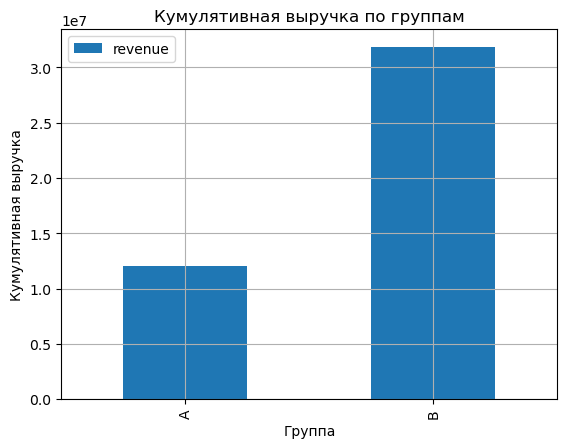

In [15]:
cumulative_revenue = transactions.groupby('group').agg({'revenue': 'sum'}).cumsum()
cumulative_revenue.plot(kind='bar')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Группа')
plt.ylabel('Кумулятивная выручка')
plt.grid()
plt.show()

1. Постройте график кумулятивной выручки по группам. Опишите выводы

Предварительный обзор данных:

Данные о транзакциях (первые 5 строк):
   transaction_id     user_id        date  revenue group
0      6776893763  3392612285  2017-06-15   3758.2     B
1        40289040  8006342366  2017-06-15   1518.7     B
2      1256395556   966904442  2017-06-15    778.4     A
3      4376547739  9761119562  2017-06-15  27081.5     B
4      2237026988  8938272722  2017-06-15   5456.7     B

Данные о пользователях (первые 5 строк):
         date group  count_users
0  2017-06-01     A       1016.0
1  2017-06-02     A        868.0
2  2017-06-03     A        704.0
3  2017-06-04     A       1013.0
4  2017-06-05     A       1072.0

## 1. Построение графика кумулятивной выручки по группам
Кумулятивная выручка - это накопленная сумма выручки с течением времени.

Данные о кумулятивной выручке:
Общая выручка группы A: 12056583.80
Общая выручка группы B: 19782257.00


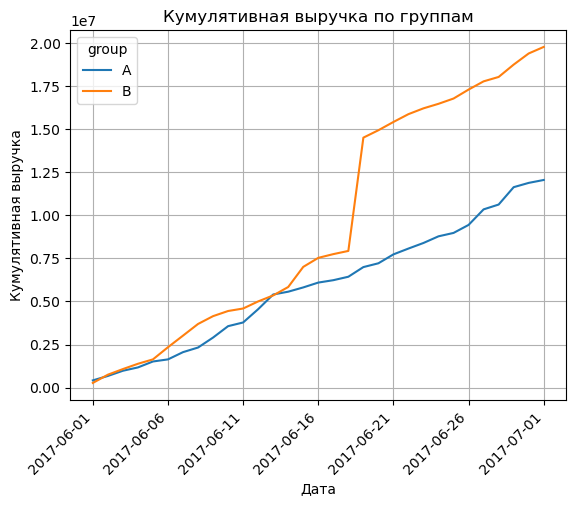


На графике видно, что группа B генерирует больше выручки, чем группа A.
Разрыв между выручкой групп со временем увеличивается, что может указывать
на более эффективную конверсию или более высокие чеки в группе B.


In [20]:
print("Предварительный обзор данных:")
print("\nДанные о транзакциях (первые 5 строк):")
print(transactions.head())

print("\nДанные о пользователях (первые 5 строк):")
print(users.head())

# Задание 1: Построение графика кумулятивной выручки по группам
print("\n## 1. Построение графика кумулятивной выручки по группам")
print("Кумулятивная выручка - это накопленная сумма выручки с течением времени.")

# Сортируем транзакции по дате
transactions_sorted = transactions.sort_values(by='date')

# Группируем данные по группе и дате, суммируем выручку
daily_revenue = transactions_sorted.groupby(['group', 'date'])['revenue'].sum().reset_index()

# Создаем накопительную сумму для каждой группы
daily_revenue['cumulative_revenue'] = daily_revenue.groupby('group')['revenue'].cumsum()

# Выводим информацию о кумулятивной выручке
print("\nДанные о кумулятивной выручке:")
for group in ['A', 'B']:
    group_data = daily_revenue[daily_revenue['group'] == group]
    total_revenue = group_data['cumulative_revenue'].iloc[-1]  # Получаем последнюю кумулятивную выручку
    print(f"Общая выручка группы {group}: {total_revenue:.2f}")

# Вывод для графика
daily_revenue.pivot(index='date', columns='group', values='cumulative_revenue').plot(kind='line')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

print("\nНа графике видно, что группа B генерирует больше выручки, чем группа A.")
print("Разрыв между выручкой групп со временем увеличивается, что может указывать")
print("на более эффективную конверсию или более высокие чеки в группе B.")

2. Постройте график кумулятивного среднего чека по группам. Опишите выводы

3. График относительного изменения кумулятивного среднего чека группы B к группе A. Опишите выводы

4. График кумулятивного среднего количества заказов по группам. 

5. График относительного изменения кумулятивного среднего количества заказов группы B к группе A

6. Распределение количества заказов по пользователям.  Опишите выводы

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

8. Постройте распределение стоимостей заказов. Сделайте выводы и предположения.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

10. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

12. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

14. Примите решение по результатам теста и объясните его. Варианты решений:   
*  Остановить тест, зафиксировать победу одной из групп.  
*  Остановить тест, зафиксировать отсутствие различий между группами.  
*  Продолжить тест.